In [40]:
# import warnings
# warnings.filterwarnings('ignore')

In [41]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("job_postings.csv")
df.head()

,Unnamed: 0,Job Posting ID,date_time,Job_Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job_Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size,Unnamed: 18
0,0,2701524240,01-01-2017,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States6,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees",NaN,NaN,NaN,NaN,NaN
1,1,2719108338,01-01-2017,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'Cloud computing', 'python', 'sp...",United States1,Brinks Home,Consumer Electronics,"1,001-5,000 employees",NaN,NaN,NaN,NaN,NaN
2,2,2719503370,01-01-2017,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['MongoDB', 'oracle', 'Microsoft', 'css', 'jav...",United States16,Paycor,Computer Software,"1,001-5,000 employees",NaN,NaN,NaN,NaN,NaN
3,3,2734877741,01-01-2017,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ1",Optum,Hospital & Health Care,"10,001+ employees",NaN,NaN,NaN,NaN,NaN
4,4,2752415616,01-01-2017,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'Swift', 'program...","Richmond, CA",Toptal,Internet,"1,001-5,000 employees",NaN,NaN,NaN,NaN,NaN


In [43]:
# Drop unnecessary columns
drop_cols = ['Unnamed: 0','Unnamed: 18','Job Posting ID', 'date_time', 'Job Title Additional Info', 'Job Position Type',
             'Minimum Pay', 'Maximum Pay', 'Pay Rate', 'Number of Applicants', 'Company Name']
df.drop(columns=drop_cols, inplace=True)

In [44]:
df.shape

(25114, 8)

In [45]:
df.head(1)

,Job_Title,Job Title Full,Job Position Level,Years of Experience,Job_Skills,Job Location,Company Industry,Company Size
0,Software Engineer,Software Engineer,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States6,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25114 entries, 0 to 25113
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_Title            25114 non-null  object
 1   Job Title Full       25114 non-null  object
 2   Job Position Level   25114 non-null  object
 3   Years of Experience  25114 non-null  int64 
 4   Job_Skills           25114 non-null  object
 5   Job Location         25114 non-null  object
 6   Company Industry     1765 non-null   object
 7   Company Size         1763 non-null   object
dtypes: int64(1), object(7)
memory usage: 1.5+ MB


In [47]:
from ast import literal_eval
df['Job_Skills'] = df['Job_Skills'].apply(literal_eval)
all_skills = [skill.lower() for sublist in df['Job_Skills'] for skill in sublist]

df['Job_Skills'] = df['Job_Skills'].apply(lambda skills: [skill.lower().strip() for skill in skills])

In [48]:
df['Job_Skills'] = df['Job_Skills'].apply(lambda skills: list(set(skills)))

In [49]:
standard_skills = {
    'ml': 'machine learning',
    'm.l.': 'machine learning',
    'machine_learning': 'machine learning',
    'xmachine learning': 'machine learning',
    'machine learningops' : 'machine learning',
    'machine learning5' : 'machine learning',
    'htmachine learning': 'machine learning',
    'nodejs': 'node.js',
    'c/c++': 'c++',
    'js': 'javascript',
    'html5': 'html',
    'css3': 'css',
    'vue':'vuejs',
    'node':'nodejs',
    'data_lake':'datalake',
    't-sql': 'sql',
    'nosql': 'no-sql',
    'ci/cd': 'ci-cd',
    'gcp': 'google cloud',
    'aws': 'amazon web services',
    'azure': 'microsoft azure',
    'ssas':'sas',
    'sass':'sas',
    'codebase':'spark',
    'jupyter':'jupyter notebook',
    'powerbitbucket':'powerbi',
    'power_bi': 'powerbi',
    'back-end':'backend',
    'postgres':'postgresql',
    'unix':'linux',
    'ubuntu':'linux',
    'javascriton':'javascript',
    'powerpoints':'powerpoint',
    'spreadsheets':'spreadsheet'
    # Add more variations as you find them
}

def normalize_skills(skills):
    return [standard_skills.get(skill, skill) for skill in skills]

df['Job_Skills'] = df['Job_Skills'].apply(normalize_skills)


<Axes: >

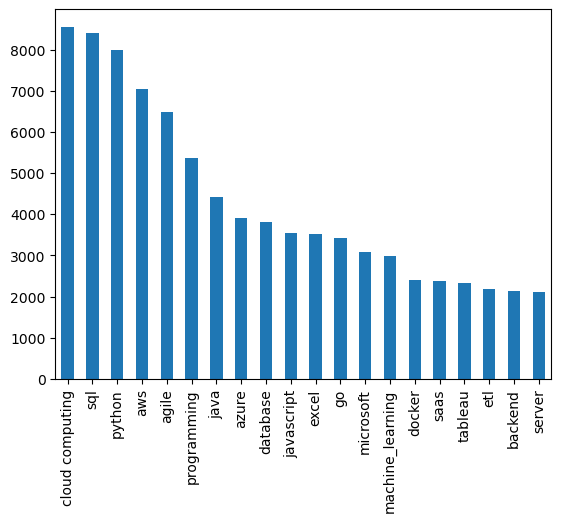

In [50]:
pd.Series(all_skills).value_counts().head(20).plot(kind='bar')

In [51]:
text_cols = ['Job_Title', 'Job Title Full', 'Job Position Level',  'Company Industry', 'Job Location']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [52]:
df.to_csv("cleaned_job_data.csv", index=False)

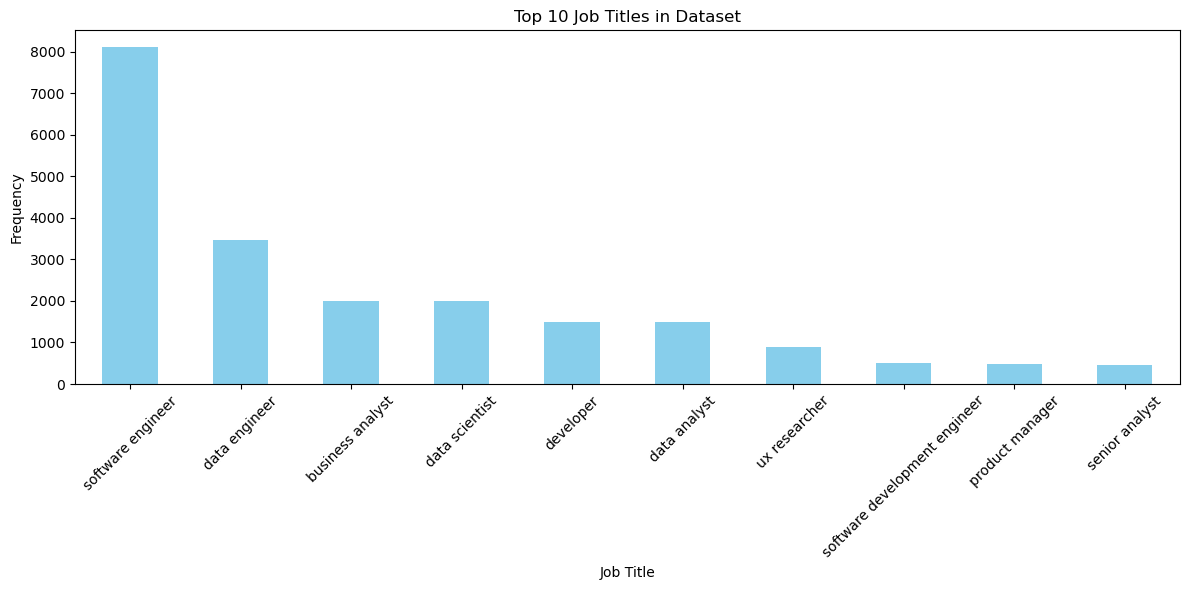

In [53]:
plt.figure(figsize=(12,6))
df['Job_Title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles in Dataset')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

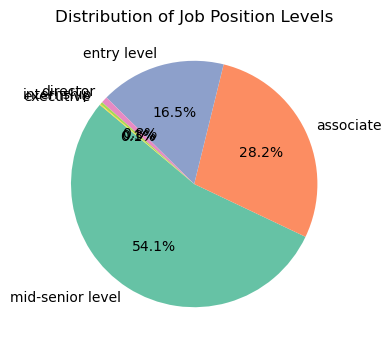

In [54]:
plt.figure(figsize=(6,4))
df['Job Position Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Job Position Levels')
plt.ylabel('')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


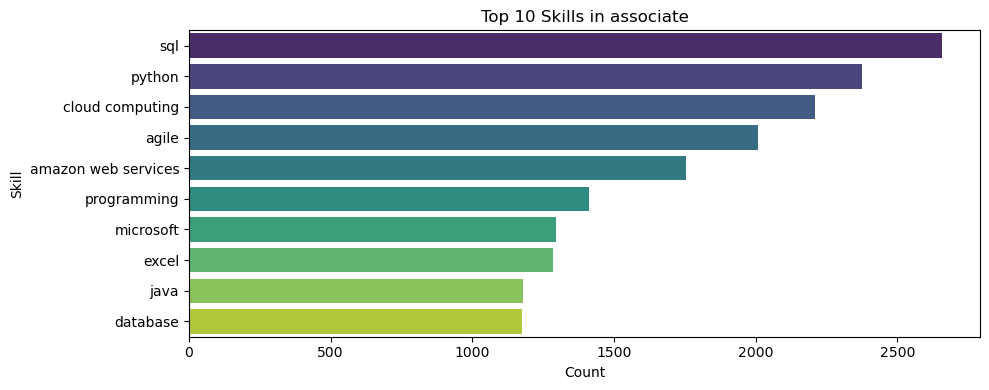

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


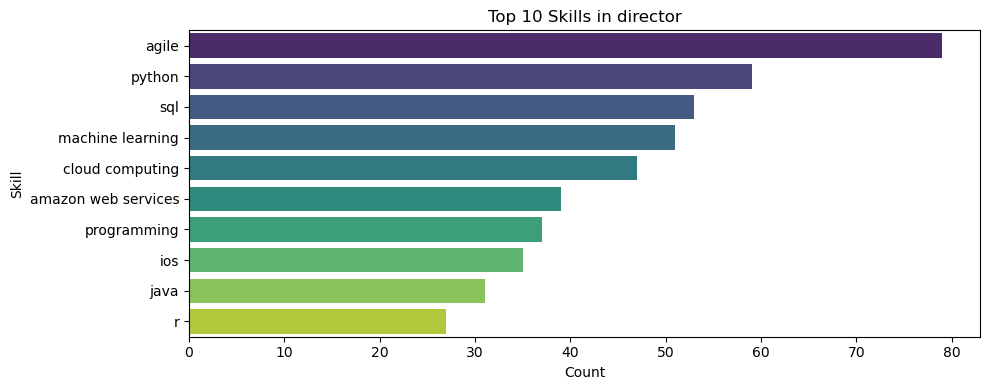

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


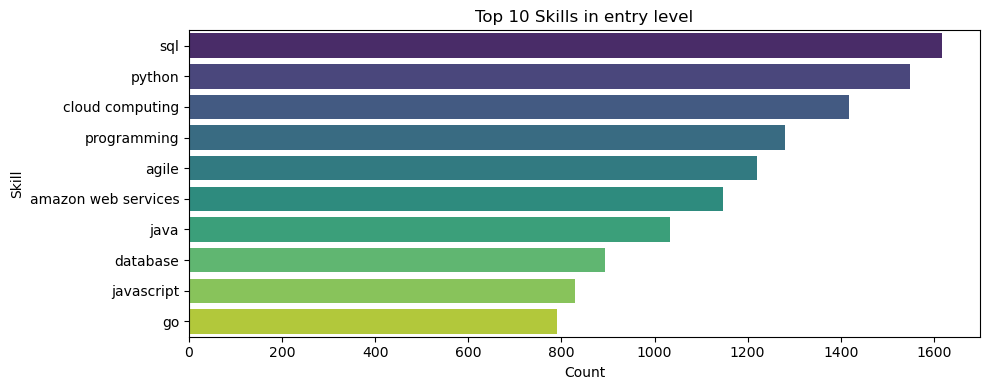

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


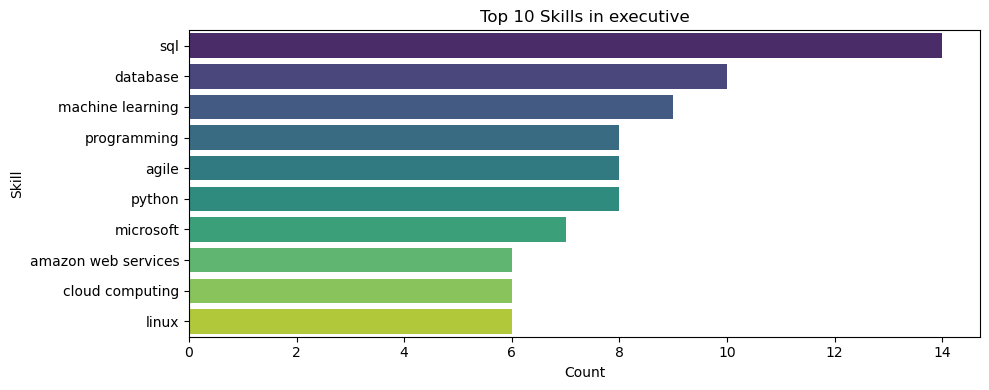

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


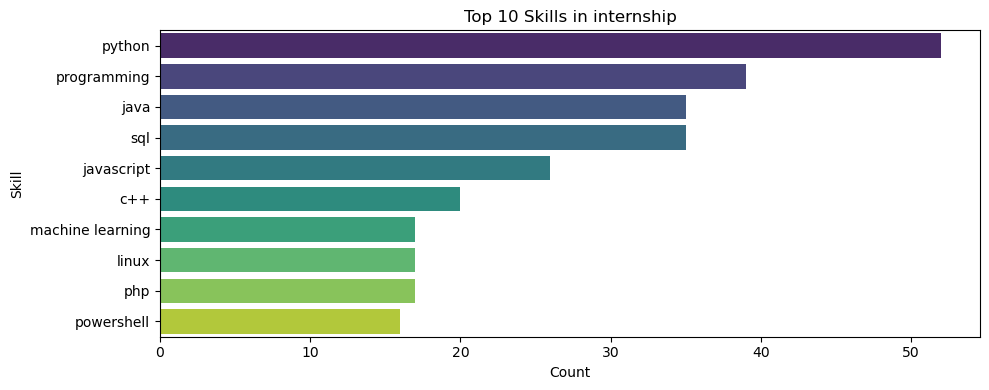

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


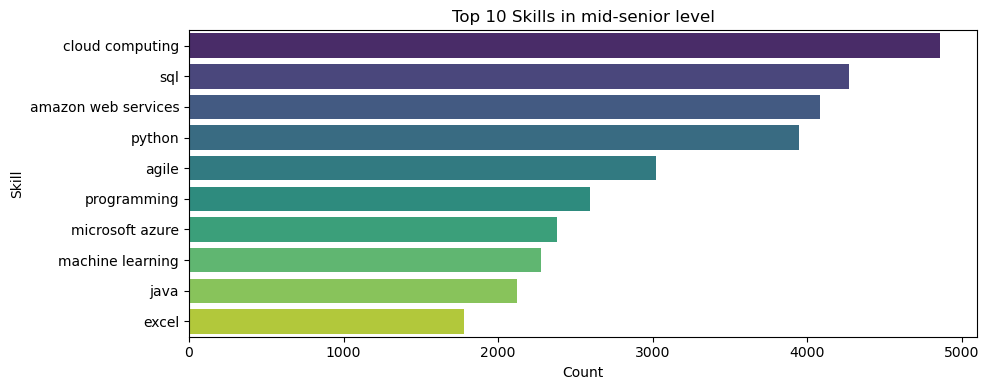

In [55]:
# Top Skills per Position Level (Group-based Skill Analysis)
def top_skills_by_group(group_col, top_n=10):
    grouped = df.groupby(group_col)['Job_Skills'].apply(lambda x: [i for sub in x for i in sub])
    for level, skills in grouped.items():
        top_skills = pd.Series(skills).value_counts().head(top_n)
        plt.figure(figsize=(10,4))
        sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')
        plt.title(f'Top {top_n} Skills in {level}')
        plt.xlabel('Count')
        plt.ylabel('Skill')
        plt.tight_layout()
        plt.show()

top_skills_by_group('Job Position Level', top_n=10)

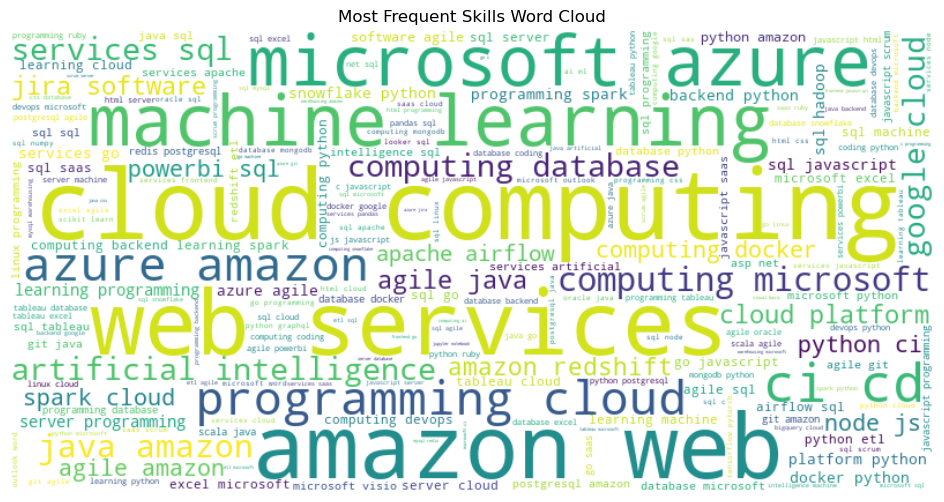

In [56]:
# Most Common Skills Overall (Word Cloud)
from wordcloud import WordCloud

flat_skills = [skill for sublist in df['Job_Skills'] for skill in sublist]
skill_text = ' '.join(flat_skills)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skill_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Skills Word Cloud")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


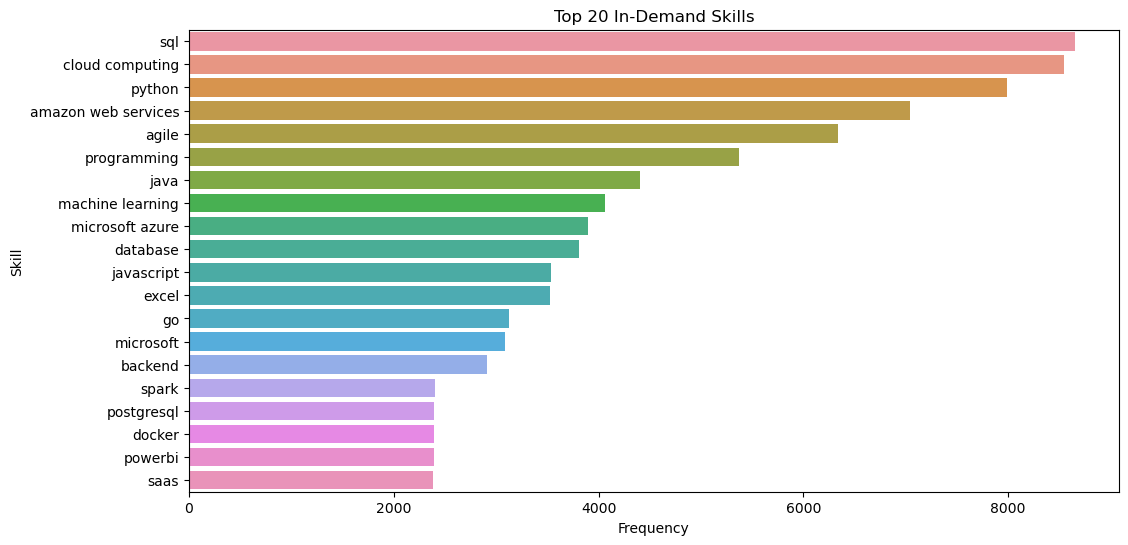

In [57]:
from collections import Counter

# Flatten all skills across job posts
all_skills_flat = [skill for skills in df['Job_Skills'] for skill in skills]

# Count frequency
skill_counts = Counter(all_skills_flat)

# Convert to DataFrame for easy use
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot top 20
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Skill', data=skill_df.head(20))
plt.title('Top 20 In-Demand Skills')
plt.show()


In [58]:
# Encode Skills into Multi-Label Format (for ML tasks later)
# Make each skill a column (0/1 per row) – required for clustering or classification.

# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# skill_matrix = mlb.fit_transform(df['Job_Skills'])

# # Combine with original data
# skill_df_encoded = pd.DataFrame(skill_matrix, columns=mlb.classes_)
# df_skills_encoded = pd.concat([df.reset_index(drop=True), skill_df_encoded], axis=1)

In [59]:
# Add Target Feature (for prediction)
# target_col = 'Job_Title'  # you can also use 'Job Position Level' or 'Industry'
# df_skills_encoded['target'] = df_skills_encoded[target_col]

In [60]:
# Transform Data into Skill-Job Matrix
# Each row = job
# Each column = skill
# Value = 1 if the skill is required
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
skill_matrix = mlb.fit_transform(df['Job_Skills'])
skill_df_encoded = pd.DataFrame(skill_matrix, columns=mlb.classes_)
df_encoded = pd.concat([df.reset_index(drop=True), skill_df_encoded], axis=1)


In [61]:
# Apply Association Rule Mining (Apriori)

# To find skills that appear together often (like ml → python → pandas)

from mlxtend.frequent_patterns import apriori, association_rules

# Reuse only skill columns
frequent_items = apriori(df_encoded[mlb.classes_], min_support=0.02, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# Sort by confidence
rules.sort_values('confidence', ascending=False).head(10)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1682,"(powerpoint, word)",(excel),0.021104,0.140280,0.020905,0.990566,7.061333,1.0,0.017944,91.130286,0.876889,0.148810,0.989027,0.569793
2224,"(cloud computing, google cloud platform, micro...",(amazon web services),0.026320,0.280242,0.025723,0.977307,3.487367,1.0,0.018347,31.717332,0.732531,0.091592,0.968471,0.534547
1060,"(google cloud platform, microsoft azure)",(amazon web services),0.028072,0.280242,0.027395,0.975887,3.482298,1.0,0.019528,29.848784,0.733422,0.097519,0.966498,0.536821
2724,"(sql, r, machine learning)",(python),0.022856,0.317990,0.022139,0.968641,3.046137,1.0,0.014871,21.748542,0.687427,0.069465,0.954020,0.519131
2738,"(sql, machine learning, spark)",(python),0.023373,0.317990,0.022577,0.965928,3.037607,1.0,0.015145,20.016995,0.686847,0.070822,0.950042,0.518464
2309,"(microsoft azure, microsoft, amazon web services)",(cloud computing),0.025563,0.340408,0.024648,0.964174,2.832410,1.0,0.015946,18.411227,0.663916,0.072212,0.945685,0.518290
2752,"(powerbi, python, tableau)",(sql),0.027913,0.336864,0.026599,0.952924,2.828811,1.0,0.017196,14.086618,0.665058,0.078653,0.929011,0.515942
1834,"(r, machine learning)",(python),0.033328,0.317990,0.031735,0.952210,2.994466,1.0,0.021137,14.271060,0.689014,0.099302,0.929928,0.526005
2781,"(python, r, tableau)",(sql),0.025046,0.336864,0.023772,0.949126,2.817534,1.0,0.015335,13.034769,0.661651,0.070301,0.923282,0.509846
2766,"(sql, programming, spark)",(python),0.021741,0.317990,0.020626,0.948718,2.983484,1.0,0.013713,13.299196,0.679596,0.064637,0.924807,0.506791


In [62]:
# Build a Simple Skill Recommender 
def recommend_skills(input_skills, rules_df, top_n=5):
    input_skills = set([skill.lower() for skill in input_skills])
    recommendations = set()

    for _, row in rules_df.iterrows():
        if input_skills.issuperset(row['antecedents']):
            recommendations.update(row['consequents'])

    final_recommendations = list(recommendations - input_skills)
    return final_recommendations[:top_n]

# Example:
recommend_skills(['python', 'sql'], rules)


['mysql', 'looker', 'jira software', 'saas', 'scrum']

In [63]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# df['skills_str'] = df['Job_Skills'].apply(lambda x: ' '.join([s.lower() for s in x]))
# X = df['skills_str']
# y = df['Company Industry']

In [64]:
import pickle

# Assuming your association rules DataFrame is called 'rules'
with open("skill_rules.pkl", "wb") as f:
    pickle.dump(rules, f)


In [65]:
# Reload test
with open("skill_rules.pkl", "rb") as f:
    loaded_rules = pickle.load(f)

print(loaded_rules.head())

             antecedents            consequents  antecedent support  \
0  (amazon web services)                (agile)            0.280242   
1                (agile)  (amazon web services)            0.252489   
2              (backend)                (agile)            0.109421   
3                (agile)              (backend)            0.252489   
4                (ci-cd)                (agile)            0.081548   

   consequent support   support  confidence      lift  representativity  \
0            0.252489  0.077606    0.276925  1.096783               1.0   
1            0.280242  0.077606    0.307365  1.096783               1.0   
2            0.252489  0.038903    0.355531  1.408108               1.0   
3            0.109421  0.038903    0.154077  1.408108               1.0   
4            0.252489  0.040814    0.500488  1.982221               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.006848    1.033795       0.122600  0.170516

In [ ]:
# python -m streamlit run app.py
